<a href="https://colab.research.google.com/github/rabbi123080/A-Convolutional-Neural-Network-Model-for-Screening-COVID-19-Patients-Based-on-CT-Scan-Images/blob/main/COVID_BIM_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing libraries
from pathlib import Path
import glob
import pandas as pd

# reading images from path
images_dir = Path('/content/drive/MyDrive/Research/Covid Conference/NonCovid')
images = images_dir.glob("*.*")

images_dir1 = Path('/content/drive/MyDrive/Research/Covid Conference/Healthy')
images1 = images_dir1.glob("*.*")

images_dir2 = Path('/content/drive/MyDrive/Research/Covid Conference/Covid')
images2 = images_dir2.glob("*.*")

train_data = []

for img in images:
    train_data.append((img,0))
for img1 in images1:
    train_data.append((img1,1))
for img2 in images2:
    train_data.append((img2,2))   

len(train_data)

3790

In [ ]:
train_data = pd.DataFrame(train_data,columns=['image','label'],index = None)

In [ ]:
train_data.shape

(3790, 2)

In [ ]:
train_data['label'].value_counts()

1    1309
2    1252
0    1229
Name: label, dtype: int64

In [ ]:
import cv2
img = cv2.imread(str(train_data['image'][0]))
img = cv2.resize(img, (229,229))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [ ]:
train_image = []
for i in tqdm(range(train_data.shape[0])):
    img = image.load_img(str(train_data['image'][i]), target_size=(64,64,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

  0%|          | 0/3790 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 3790/3790 [16:59<00:00,  3.72it/s]


In [ ]:
X = np.array(train_image)

In [ ]:
y=train_data['label'].values
y = to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
len(X_train)

3032

Convolutional Neural Network

In [ ]:
# Define the model structure
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(64,64,1)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
86/86 [==============================] - 52s 591ms/step - loss: 0.7612 - accuracy: 0.5978 - val_loss: 0.4105 - val_accuracy: 0.7829
Epoch 2/50
86/86 [==============================] - 50s 578ms/step - loss: 0.3731 - accuracy: 0.8268 - val_loss: 0.3424 - val_accuracy: 0.8059
Epoch 3/50
86/86 [==============================] - 50s 578ms/step - loss: 0.3142 - accuracy: 0.8598 - val_loss: 0.1808 - val_accuracy: 0.9243
Epoch 4/50
86/86 [==============================] - 50s 584ms/step - loss: 0.2348 - accuracy: 0.9097 - val_loss: 0.1969 - val_accuracy: 0.9243
Epoch 5/50
86/86 [==============================] - 52s 606ms/step - loss: 0.2182 - accuracy: 0.9182 - val_loss: 0.1616 - val_accuracy: 0.9474
Epoch 6/50
86/86 [==============================] - 53s 617ms/step - loss: 0.1915 - accuracy: 0.9216 - val_loss: 0.2213 - val_accuracy: 0.9013
Epoch 7/50
86/86 [==============================] - 50s 581ms/step - loss: 0.1777 - accuracy: 0.9330 - val_loss: 0.2152 - val_accuracy: 0.9013

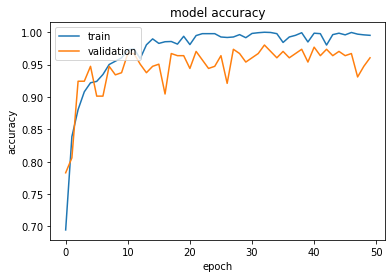

In [ ]:
 plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

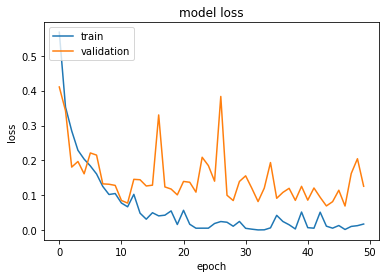

In [ ]:
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
len(X_test)

758

In [ ]:
Y_TEST = np.argmax(y_test, axis =1)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_TEST, pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       271
           1       1.00      1.00      1.00       264
           2       0.94      0.94      0.94       223

    accuracy                           0.96       758
   macro avg       0.96      0.96      0.96       758
weighted avg       0.96      0.96      0.96       758



<function matplotlib.pyplot.show>

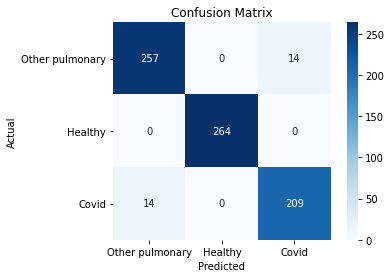

In [ ]:
import seaborn as sns
import sklearn.metrics as metrics
plt.figure()

ax = plt.subplot()

ax.set_title('Confusion Matrix')
pred = model.predict_classes(X_test)
Y_TEST = np.argmax(y_test, axis =1)
cm = metrics.confusion_matrix(Y_TEST,pred)
classes=['Other pulmonary', 'Healthy', 'Covid']
sns.heatmap(cm, fmt='d', annot=True, square=True, cbar=True, xticklabels=classes, yticklabels=classes,cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show

In [ ]:
pred = model.predict_classes(X_test)
Y_TEST = np.argmax(y_test, axis =1)
cm = metrics.confusion_matrix(Y_TEST,pred)
print(cm)

[[257   0  14]
 [  0 264   0]
 [ 14   0 209]]


In [ ]:
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt_False_Positive_vs_True_Positive

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

PRED = to_categorical(pred)
y = train_data['label'].values
# Binarize the output
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

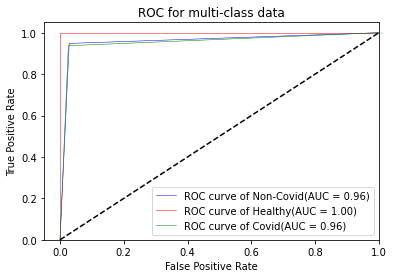

In [ ]:
colors = ['blue', 'red', 'green']
cls = {0:'Non-Covid', 1:'Healthy', 2:'Covid'}
for i, color ,c in zip(range(3), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

<function matplotlib.pyplot.show>

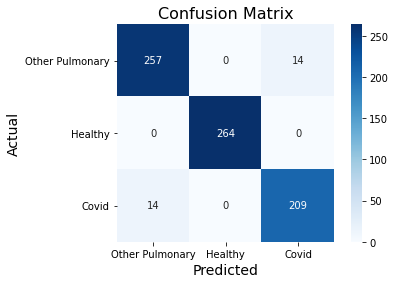

In [ ]:
import seaborn as sns
import sklearn.metrics as metrics
plt.figure()

ax = plt.subplot()
label_font = {'size':'16'}
ax.set_title('Confusion Matrix', fontdict=label_font)
pred = model.predict_classes(X_test)
Y_TEST = np.argmax(y_test, axis =1)
cm = metrics.confusion_matrix(Y_TEST,pred, normalize=None)
classes=['Other Pulmonary', 'Healthy', 'Covid']
sns.heatmap(cm, square=True, annot=True, fmt='g', cbar=True, xticklabels=classes, yticklabels=classes,cmap='Blues')
label_font1 = {'size':'14'}
plt.xlabel('Predicted', fontdict=label_font1)
label_font2 = {'size':'14'}
plt.ylabel('Actual', fontdict=label_font2)
plt.show